# Online Selection of HLS Representations

In [1]:
from lrcb.bandits.multirep_finite import FiniteMultiBandit
from lrcb.representations.finite_representations import make_random_rep, fix_rank, hls_rank, rank, derank
from lrcb.representations.finite_representations import is_cmb, is_hls, spans
from lrcb.algos.oful import oful
from lrcb.algos.lr_oful import select_oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu

## Problem settings (common)

In [2]:
nc = 100
na = 5
dim = 20
noise = 0.1
seeds = [1, 2, 3, 4, 5]

## CMB, same parameter

Generate HLS representation

In [3]:
r0 = make_random_rep(nc, na, dim, normalize=True)
assert is_hls(r0)

Generate non-HLS equivalent representations with varying HLS rank

In [4]:
reps = [derank(r0, i) for i in range(1, dim)]
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


OFUL settings

In [5]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

Regret of OFUL with different representations

In [6]:
names = []
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

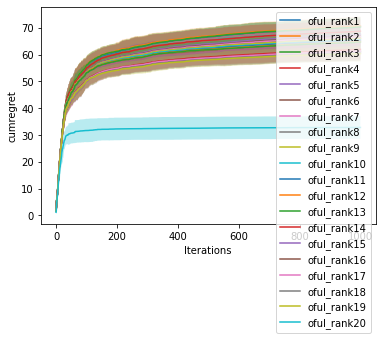

In [7]:
names = ['oful_rank%d' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [8]:
nu.tournament('../logs', names, 'cumregret', seeds)

[('oful_rank20', 32.826113225733046),
 ('oful_rank19', 60.42132034960857),
 ('oful_rank18', 60.67590353870547),
 ('oful_rank15', 61.12443547556934),
 ('oful_rank16', 61.320025705992904),
 ('oful_rank17', 61.36389155154448),
 ('oful_rank14', 62.00377785386512),
 ('oful_rank13', 64.71811081240452),
 ('oful_rank12', 64.91002618373523),
 ('oful_rank11', 65.2904383309623),
 ('oful_rank10', 65.5782553812882),
 ('oful_rank9', 66.11536471522325),
 ('oful_rank8', 66.14833478311174),
 ('oful_rank7', 66.7083524733555),
 ('oful_rank6', 67.05013320565857),
 ('oful_rank5', 67.57585371319428),
 ('oful_rank4', 68.79602500127034),
 ('oful_rank3', 70.35946102762945),
 ('oful_rank1', 70.54802717583793),
 ('oful_rank2', 70.74900747911995)]

Regret of model-selection algorithm compared to best model

In [9]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select')

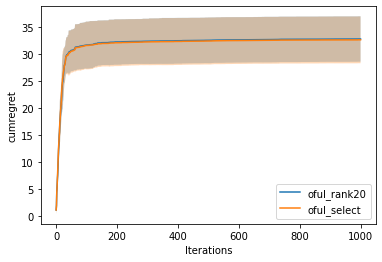

In [10]:
names = ['oful_rank%d' % dim, 'oful_select']
        
nu.compare('../logs', names, 'cumregret', seeds)

Representations selected by model-selection algorithm

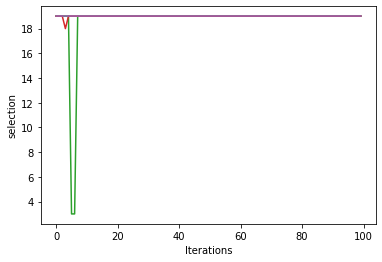

In [11]:
nu.plot_all('../logs', 'oful_select', 'selection', seeds, rows=100)